In [ ]:
from altair import Chart, load_dataset
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, SGDRegressor, SGDClassifier, LogisticRegression
pd.options.display.expand_frame_repr = True

$\theta = (X^T X)^{-1}X^T y$

derived by zeroing gradients of mean squared error

QA

* why transform features non-linearly ? to deal with non-linearly separable cases
* the diff between train and test error is the epsilon in hoefding ineq

In [5]:
df = pd.read_csv('amazon-fine-foods/Reviews.csv.gz')

In [6]:
df.sample(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
165841,165842,B000CPZSC8,AVNMFOA75LSZD,"C. Sheely ""casavon""",0,0,5,1335484800,GREAT Vanilla beans!!,I bought these mainly to make my own vanilla. ...
457732,457733,B001UJJXYY,A2J57VGDETZKF6,4 Kids 2 Exhausted,2,2,5,1328400000,This stuff rocks,"Fantastic, delicious, and yummy. My wife doesn..."
245600,245601,B004OAZ36I,A2SS9AQLF4V4FO,knigjim,0,0,2,1348617600,Mixed Bag of What,These were all thrown into a brown lunch bag. ...
93793,93794,B003Y3F4RO,A1BTHZO04GVCS6,HB,3,3,4,1312502400,Sweet corn & carrot,My daughter has liked all the earth's best foo...
211119,211120,B001HTJFGI,A1E526IHGETA07,Guy Incognito,4,4,5,1328227200,Better Than Chicken Stock,"First, a caveat: I am a vegetarian. Not a hip..."


In [7]:
X = df['Text']
y = df['Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [8]:
tf = TfidfVectorizer().fit(X_train)

In [ ]:
#reg = LogisticRegression(verbose=1)
reg = LinearRegression()
reg.fit(tf.transform(X_train), y_train)

In [ ]:
(reg.predict(tf.transform(X_test)) == y_test).mean()

In [115]:
len(tf.get_feature_names())

89497

In [116]:
plt.bar()

(89497,)

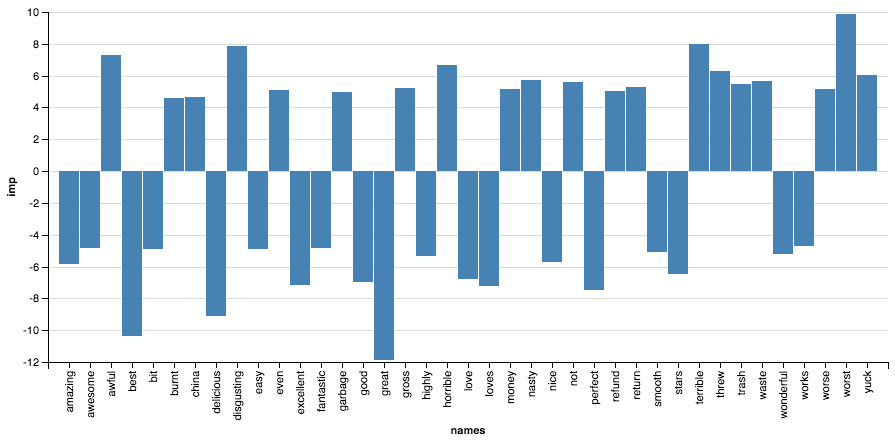

In [146]:
df = {'names': tf.get_feature_names(), 'imp': reg.coef_[0]}
df = pd.DataFrame(df)
df = df.sort_values(by='imp', ascending=False)
nb = 20
df = pd.concat((df.iloc[0:nb], df.iloc[-1:-nb:-1]))
Chart(df).mark_bar().encode(x='names', y='imp')

In [133]:
Chart(df).encode.__docs__

AttributeError: 'function' object has no attribute '__docs__'

In [ ]:
Chart(df).encode